# Polynomial Regression

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pd.options.display.float_format = '{:,.2f}'.format

In [53]:
df = pd.read_csv('./Position_Salaries.csv')
print(f'{df.head()}')
print('---------------------------------------------------')
print(f'{df.describe()}')
print('---------------------------------------------------')
print(f'{df.info()}')
print('---------------------------------------------------')
print(f'{df.columns}')

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
---------------------------------------------------
       Level       Salary
count  10.00        10.00
mean    5.50   249,500.00
std     3.03   299,373.88
min     1.00    45,000.00
25%     3.25    65,000.00
50%     5.50   130,000.00
75%     7.75   275,000.00
max    10.00 1,000,000.00
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes
None
---------------------------------------------------
Index(['Position', 'Level', 'Salary'], dtype='object')


### Getting X & y

In [54]:
X = df.iloc[:,1:2].values
y = df['Salary'].values

In [55]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (10, 1)
y shape: (10,)


### Fitting linear regression to the data set

In [56]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Fitting polynomial regression to the data set

In [57]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

In [58]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

### Predicting values

In [64]:
y_lin_pred = lin_reg.predict(X)

In [65]:
y_lin_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [66]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid)),1)

In [67]:
y_pol_pred = lin_reg_2.predict(poly_reg.fit_transform(X_grid))

In [68]:
y_pol_pred

array([ 53356.64335681,  52718.9961192 ,  52092.0208885 ,  51475.64656908,
        50869.80227894,  50274.41734973,  49689.42132673,  49114.74396884,
        48550.31524863,  47996.06535229,  47451.92467963,  46917.82384413,
        46393.69367287,  45879.4652066 ,  45375.06969967,  44880.43862011,
        44395.50364955,  43920.19668328,  43454.4498302 ,  42998.19541288,
        42551.3659675 ,  42113.89424388,  41685.71320549,  41266.75602943,
        40856.95610642,  40456.24704084,  40064.56265071,  39681.83696765,
        39308.00423695,  38942.99891753,  38586.75568194,  38239.20941636,
        37900.29522063,  37569.9484082 ,  37248.10450617,  36934.69925528,
        36629.6686099 ,  36332.94873803,  36044.47602132,  35764.18705505,
        35492.01864813,  35227.90782311,  34971.79181619,  34723.60807719,
        34483.29426957,  34250.78827042,  34026.0281705 ,  33808.95227415,
        33599.4990994 ,  33397.60737788,  33203.21605487,  33016.2642893 ,
        32836.69145371,  

### Plotting the linear regression results

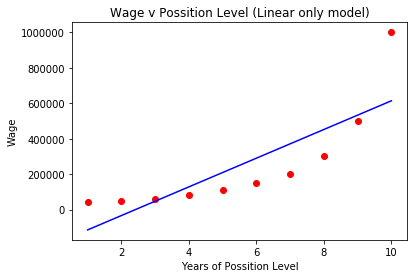

In [69]:
plt.scatter(X, y, c='r')
plt.plot(X, y_lin_pred, c='b')
plt.title('Wage v Possition Level (Linear only model)')
plt.xlabel('Years of Possition Level')
plt.ylabel('Wage')
plt.show()

### Plotting the linear regression results

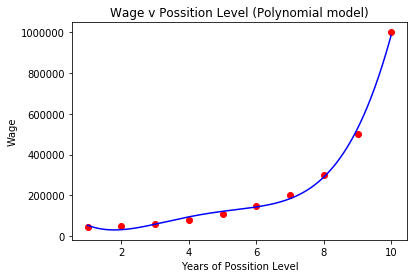

In [70]:
plt.scatter(X, y, c='r')
plt.plot(X_grid, y_pol_pred, c='b')
plt.title('Wage v Possition Level (Polynomial model)')
plt.xlabel('Years of Possition Level')
plt.ylabel('Wage')
plt.show()

### Predicting a new result with Linear Regression

In [75]:
lin_reg.predict(np.array(6.5).reshape(-1, 1))

array([330378.78787879])

### Predicting a new result with Polynomial Regression

In [76]:
lin_reg_2.predict(poly_reg.fit_transform(np.array(6.5).reshape(-1, 1)))

array([158862.45265153])